In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('worldnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading worldnet: Package 'worldnet' not found in
[nltk_data]     index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install transformers
!pip install datasets
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
import tensorflow as tf
from transformers import AutoModel
from transformers import pipeline
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification, TrainingArguments, Trainer
from transformers import DataCollatorWithPadding
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import create_optimizer

In [ ]:
files_names = [
    "raw_data/SUC_KHOE.txt",
    "raw_data/GIAO_DUC.txt",
    "raw_data/THE_THAO.txt",
    "raw_data/PHAP_LUAT.txt",
    "raw_data/KHOA_HOC.txt",
    "raw_data/DU_LICH.txt",
    "raw_data/GIAI_TRI.txt",
    "raw_data/KINH_DOANH.txt"
]


path = '/content/drive/MyDrive/vnexpress_tittle_classification/'
files = []
for i in files_names:
  files.append(path+i)



label_dir = {
    "SUC_KHOE":0,
    "GIAO_DUC":1,
    "THE_THAO":2,
    "PHAP_LUAT":3,
    "KHOA_HOC":4,
    "DU_LICH":5,
    "GIAI_TRI":6,
    "KINH_DOANH":7
}


In [ ]:
with open("/content/drive/MyDrive/vnexpress_tittle_classification/vietnamese-stopwords.txt", 'r') as f:
    stop_words = f.readlines()
    stop_words = [i.strip() for i in stop_words]
stop_words = set(stop_words)

In [ ]:
def remove_stop_word(tokens):
    return [i for i in tokens if i not in stop_words]

In [ ]:
def tokenize_sentence(sentence):
    tokens = word_tokenize(sentence, language='english')
    return tokens

In [ ]:
texts = []
labels = []
for file_name in files:
  label = file_name.split("/")[-1].split(".")[0]
  with open(file_name) as f:
    lines = f.readlines()
    for line in lines:
      line = line.strip()
      line_token = tokenize_sentence(line)
      line_token = remove_stop_word(line_token)
      line_text = ' '.join(line_token)
      texts.append(line_text)
      labels.append(label)

In [ ]:
import string
import re

def preprocessing(text):
  punc = string.punctuation
  text = text.lower()
  processed_text = text.translate(str.maketrans("", "", punc))
  processed_text = re.sub(r'\s+', ' ', processed_text)
  return processed_text

In [ ]:
processed_texts = []
for i in texts:
  processed_texts.append(preprocessing(i))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw(labels_array):
  labels_draw = np.array(labels_array)
  unique_labels, counts = np.unique(labels_draw, return_counts=True)
  bar_width = 0.5
  fig, ax = plt.subplots(figsize = (10,6))
  bars = ax.bar(unique_labels, counts, width=bar_width, color='blue', edgecolor='black')
  for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

  plt.xlabel('Nhãn')
  plt.ylabel('Số lần xuất hiện')
  plt.title('Phân phối các nhãn')
  plt.show()



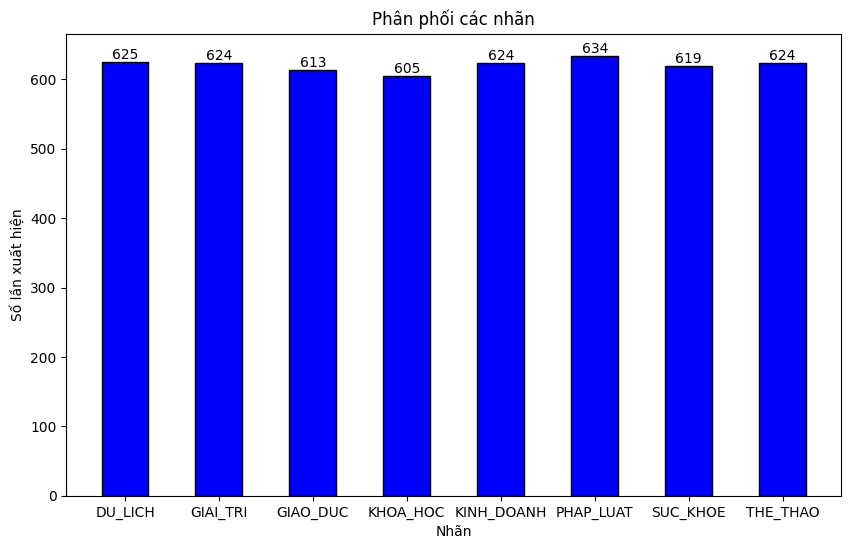

In [ ]:
draw(labels)

In [ ]:
labels_num = np.array([label_dir[label] for label in labels])
labels_num = labels_num.astype('int')

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(processed_texts, labels_num, stratify=labels, test_size=0.2, shuffle=True, random_state=42)

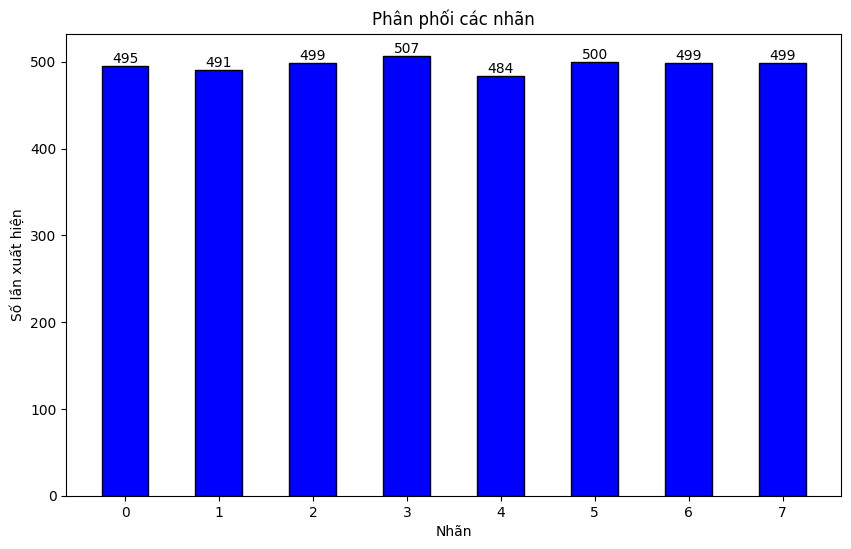

In [ ]:
draw(y_train)

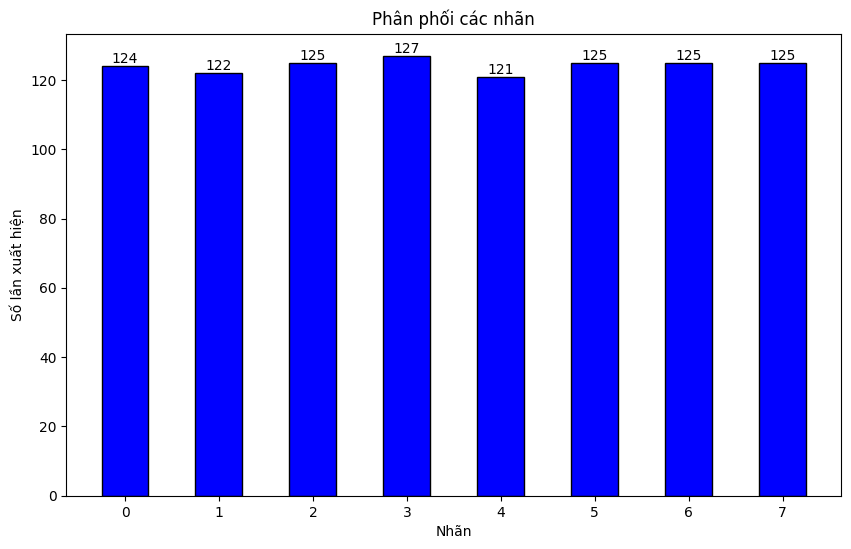

In [ ]:
draw(y_val)

In [ ]:
# sử dụng mô hình nhằm phân loại 8 lớp: 'du lịch', 'giáo dục', 'giải trí', 'khoa học', 'kinh doanh', 'pháp luật', 'sức khỏe', 'thể thao'
checkpoint = 'distilbert-base-multilingual-cased'
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=8)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

In [ ]:
# label num:
# "SUC_KHOE":0, "GIAO_DUC":1, "THE_THAO":2, "PHAP_LUAT":3, "KHOA_HOC":4
# "DU_LICH":5, "GIAI_TRI":6, "KINH_DOANH":7

train_data = {"label": y_train, "text": X_train}
test_data = {"label": y_val, "text": X_val}
train = Dataset.from_dict(train_data)
test = Dataset.from_dict(test_data)

In [ ]:
train[1]

{'label': 5, 'text': 'tàu bắc nam cách khám phá việt nam '}

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding = True)

def tokenize_sentence(sentence):
  return tokenizer(sentence, truncation=True, padding = True)

In [ ]:
train_tokenized = train.map(preprocess_function, batched=True)
test_tokenized = test.map(preprocess_function, batched=True)

Map:   0%|          | 0/3974 [00:00<?, ? examples/s]

Map:   0%|          | 0/994 [00:00<?, ? examples/s]

In [ ]:
train_tokenized

Dataset({
    features: ['label', 'text', 'input_ids', 'attention_mask'],
    num_rows: 3974
})

In [ ]:
tf_train_dataset = train_tokenized.to_tf_dataset(
    columns=["attention_mask", "input_ids"],
    label_cols=["label"],
    shuffle=False,
    batch_size=8,
    collate_fn=data_collator,
)

tf_test_dataset = test_tokenized.to_tf_dataset(
    columns=["attention_mask", "input_ids"],
    label_cols=["label"],
    shuffle=False,
    batch_size=8,
    collate_fn=data_collator,
)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:401: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [ ]:
from transformers import create_optimizer
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=False
)

checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/vnexpress_tittle_classification/best_model_weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True
)

In [ ]:
from tensorflow.keras.optimizers.schedules import PolynomialDecay

batch_size = 8
num_epochs = 7
# batches_per_epoch = len(train_tokenized) // batch_size
# total_train_steps = int(batches_per_epoch * num_epochs)
# num_warmup_steps = 0
# num_train_steps=total_train_steps

num_train_steps = len(tf_train_dataset) * num_epochs
lr_scheduler = PolynomialDecay(
    initial_learning_rate=2e-5, end_learning_rate=0.0, decay_steps=num_train_steps
)

optimizer = Adam(learning_rate= lr_scheduler)

In [ ]:
model.compile(optimizer=optimizer, metrics=['accuracy'], loss=loss, )
history = model.fit(
    tf_train_dataset,
    epochs=num_epochs,
    callbacks=[early_stopping_callback, checkpoint_callback],
    validation_data=tf_test_dataset
)

Epoch 1/7
497/497 [==============================] - 104s 107ms/step - loss: 1.3358 - accuracy: 0.5710 - val_loss: 0.7919 - val_accuracy: 0.7596
Epoch 2/7
497/497 [==============================] - 44s 90ms/step - loss: 0.6178 - accuracy: 0.8186 - val_loss: 0.6528 - val_accuracy: 0.7978
Epoch 3/7
497/497 [==============================] - 41s 83ms/step - loss: 0.3416 - accuracy: 0.9066 - val_loss: 0.6034 - val_accuracy: 0.8139
Epoch 4/7
497/497 [==============================] - 34s 69ms/step - loss: 0.1929 - accuracy: 0.9522 - val_loss: 0.6132 - val_accuracy: 0.8239
Epoch 5/7
497/497 [==============================] - 33s 67ms/step - loss: 0.1167 - accuracy: 0.9728 - val_loss: 0.6356 - val_accuracy: 0.8300
Epoch 6/7
497/497 [==============================] - 33s 66ms/step - loss: 0.0828 - accuracy: 0.9821 - val_loss: 0.6280 - val_accuracy: 0.8390


In [ ]:
preds = model.predict(tf_test_dataset)
a = preds['logits']
a = np.array(a)
class_preds = np.argmax(a, axis=1)


125/125 [==============================] - 12s 19ms/step


In [ ]:
import evaluate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

labels_list = np.array(test_tokenized['label'])
accuracy = accuracy_score(labels_list, class_preds)
f1 = f1_score(labels_list, class_preds, average = 'micro')

In [ ]:
accuracy

0.8390342052313883

In [ ]:
f1

0.8390342052313883

In [ ]:
new_sentence = "HLV Juveklopp thông báo rời liverpool cuối mùa giải này"
tokens = tokenize_sentence(new_sentence)
tokens

{'input_ids': [101, 145, 11369, 11779, 45031, 30197, 101908, 10410, 18030, 24276, 66344, 93160, 61571, 22542, 27637, 16658, 10789, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
def convert_label_to_title(label):
  convert_dict = {
    0: "SỨC KHỎE",
    1: "GIÁO DỤC",
    2: "THỂ THAO",
    3: "PHÁP LUẬT",
    4: "KHOA HỌC",
    5: "DU LỊCH",
    6: "GIẢI TRÍ",
    7: "KINH DOANH"
  }
  return convert_dict[label]


In [ ]:
def predict_sentence(model, tokenizer, sentence):
    input_data = tokenizer(sentence, return_tensors='tf', padding=True, truncation=True)
    logits = model(input_data['input_ids'], attention_mask=input_data['attention_mask']).logits
    probabilities = tf.nn.softmax(logits, axis=1)
    predicted_class = tf.argmax(logits, axis=1).numpy()[0]
    highest_probability = probabilities.numpy()[0, predicted_class]
    title = convert_label_to_title(predicted_class)
    return title, probabilities.numpy(), highest_probability



In [ ]:
# Sử dụng hàm dự đoán cho câu mới
new_sentence = "Liverpool vô địch carabao cup lần thứ 10"
title, probabilities, highest = predict_sentence(model, tokenizer, new_sentence)

print("Tiêu đề: ", new_sentence)
print("Mục dự đoán:", title)
print("Xác suất", highest)


Tiêu đề:  Liverpool vô địch carabao cup lần thứ 10
Mục dự đoán: THỂ THAO
Xác suất 0.99334705


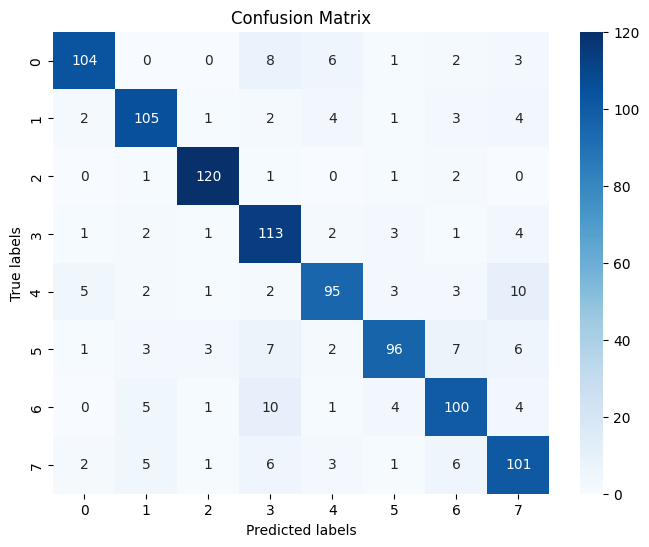

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tính confusion matrix
cm = confusion_matrix(labels_list, class_preds)

# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(labels_list), yticklabels=np.unique(labels_list))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()